In [1]:
import pandas as pd
url_path = 'https://raw.githubusercontent.com/perceptrontechnology/sukkiri-ml-codes/main/datafiles/'
file_name = 'cinema.csv'
csv_file_name = f'{url_path}{file_name}'
df = pd.read_csv(csv_file_name)
df.head(3) # 先頭3行の中身を表示

,cinema_id,SNS1,SNS2,actor,original,sales
0,1375,291.0,1044,8808.994029,0,9731
1,1000,363.0,568,10290.709370,1,10210
2,1390,158.0,431,6340.388534,1,8227


In [2]:
df.isnull().sum()

,0
cinema_id,0
SNS1,1
SNS2,0
actor,1
original,0
sales,0


In [3]:
df.isnull().any(axis = 0)

,0
cinema_id,False
SNS1,True
SNS2,False
actor,True
original,False
sales,False


In [4]:
df.mean()

,0
cinema_id,1465.310000
SNS1,370.737374
SNS2,658.510000
actor,9817.539306
original,0.500000
sales,9882.430000


In [5]:
df.mean().astype(int)

,0
cinema_id,1465
SNS1,370
SNS2,658
actor,9817
original,0
sales,9882


In [6]:
# 欠損値を平均で補完して、df2に代入
df2 = df.fillna(df.mean())
# 穴埋めができたか確認
df2.isnull().any(axis = 0)

,0
cinema_id,False
SNS1,False
SNS2,False
actor,False
original,False
sales,False


In [7]:
print(df[df['SNS1'] == 291].shape[0])
#print(df2[df2['actor'] == 9817.539306].count()) 
#浮動小数を比べる場合は、誤差が生じるため、カウント数に差異が生じる可能性がある

import numpy as np

target_mean = 9817.539306

# np.isclose は、非常に近い値を True と判定します
match_count = df2[np.isclose(df2['actor'], target_mean)].shape[0]

print(f"平均値({target_mean})で埋められたと思われる行数: {match_count}")

import numpy as np

target_mean = 370.737374

# np.isclose は、非常に近い値を True と判定します
match_count = df2[np.isclose(df2['SNS1'], target_mean)].shape[0]

print(f"平均値({target_mean})で埋められたと思われる行数: {match_count}")


1
平均値(9817.539306)で埋められたと思われる行数: 1
平均値(370.737374)で埋められたと思われる行数: 1


<Axes: xlabel='SNS2', ylabel='sales'>

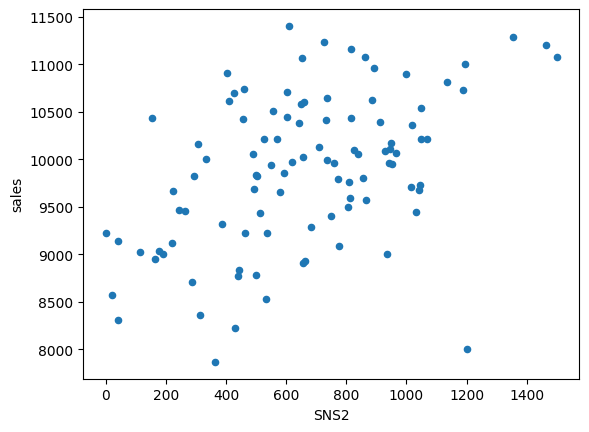

In [8]:
# JupyterLab上にグラフ描画するためのおまじない
%matplotlib inline

# SNS2とsalesの散布図の作成
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')

<Axes: xlabel='original', ylabel='sales'>

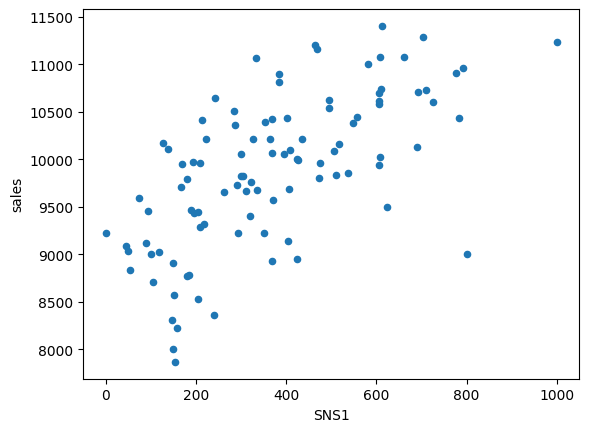

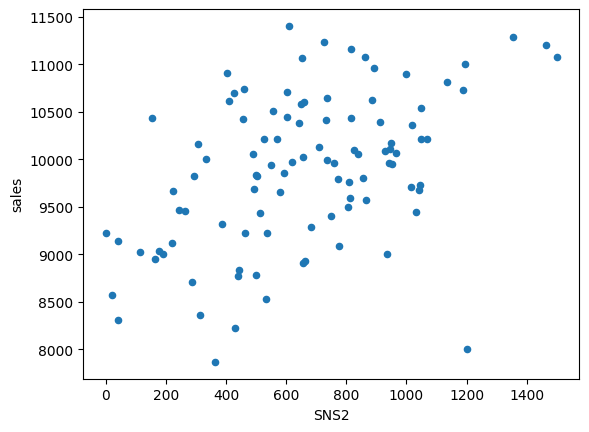

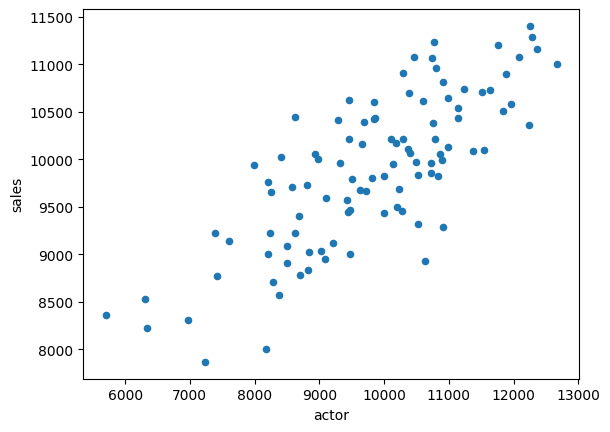

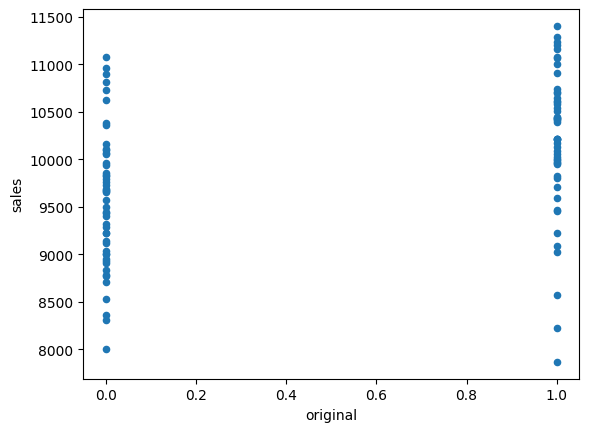

In [9]:
df2.plot(kind = 'scatter', x = 'SNS1', y = 'sales')
df2.plot(kind = 'scatter', x = 'SNS2', y = 'sales')
df2.plot(kind = 'scatter', x = 'actor', y = 'sales')
df2.plot(kind = 'scatter', x = 'original', y = 'sales')

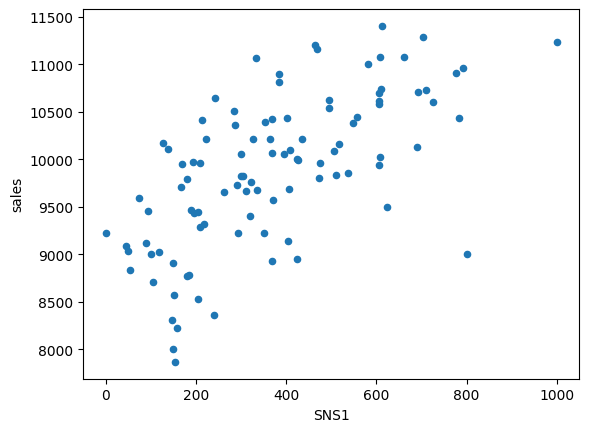

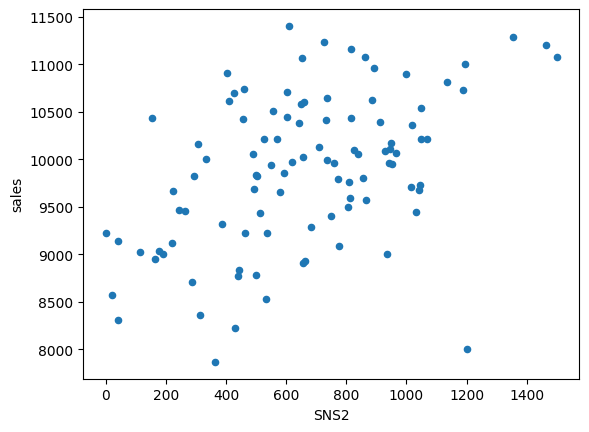

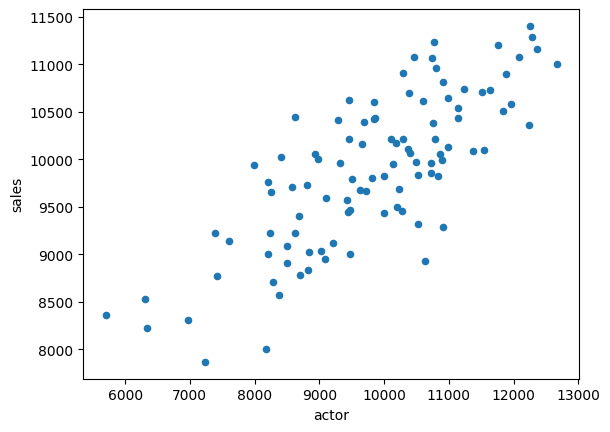

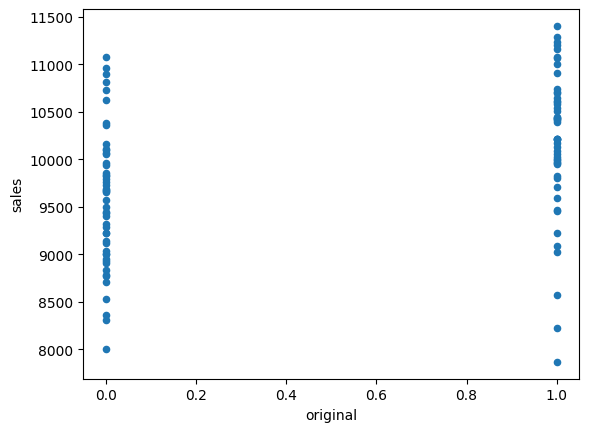

In [10]:
for name in df.columns:
#for name in df: でも可

    # x軸がcinema_id列とsales列の散布図は
    #作っても意味が無いので外す
    if name == 'cinema_id' or name == 'sales':
        continue

    df2.plot(kind = "scatter", x = name, y = "sales")

In [11]:
no = df2[(df2['SNS2'] > 1000) & (df2['sales'] < 8500)].index
df3 = df2.drop(no, axis = 0)

In [12]:
test = pd.DataFrame(
{'Acolumn':[1,2,3],
 'Bcolumn':[4,5,6]
}
)

In [13]:
test[test['Acolumn'] < 2]

,Acolumn,Bcolumn
0,1,4


In [14]:
test['Acolumn'] < 2

,Acolumn
0,True
1,False
2,False


In [15]:
df[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)]

,cinema_id,SNS1,SNS2,actor,original,sales
30,1855,149.0,1200,8173.096892,0,8000


In [16]:
no = df2[(df['SNS2'] > 1000 ) & (df['sales'] < 8500)].index
no

Index([30], dtype='int64')

In [17]:
test.drop(0,axis=0)

,Acolumn,Bcolumn
1,2,5
2,3,6


In [18]:
test.drop('Bcolumn',axis=1)

,Acolumn
0,1
1,2
2,3


In [19]:
df3 = df2.drop(no, axis = 0) # 外れ値の行を削除
df3.shape # 行が削除できたかどうかを行数で確認

(99, 6)

In [20]:
#特徴量の列の候補
col =['SNS1','SNS2','actor','original']
x=df3[col] #特徴量の抜き出し

t=df3['sales']#正解データの取り出し

In [21]:
# インデックスが2、列がSNS1のマスの値のみ参照
df3.loc[2, 'SNS1']

np.float64(158.0)

In [22]:
index = [2, 4, 6] # インデックス
col = ['SNS1', 'actor'] # 列名
df3.loc[index, col]

,SNS1,actor
2,158.0,6340.388534
4,209.0,10908.539550
6,153.0,7237.639848


In [23]:
sample = [10, 20, 30, 40] # リストの作成
sample[1:3] # 添え字が1以上3未満の要素を取得

[20, 30]

In [24]:
# 0行目以上2行目以下、actor列より左の列（actor列含む）
df3.loc[0:3, :'actor']

,cinema_id,SNS1,SNS2,actor
0,1375,291.0,1044,8808.994029
1,1000,363.0,568,10290.709370
2,1390,158.0,431,6340.388534
3,1499,261.0,578,8250.485081


In [25]:
x = df3.loc[ : , 'SNS1':'original'] # 特徴量の取り出し
t = df3['sales'] # 正解ラベルの取り出し

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

In [31]:
new = [[150, 700, 300, 0]] # 新しいデータを2次元リストで作成
model.predict(new) # 学習済みモデルで推論

In [32]:
model.score(x_test, y_test)

In [ ]:
# 関数のインポート
from sklearn.metrics import mean_absolute_error

pred = model.predict(x_test)

# 平均絶対誤差の計算
mean_absolute_error(y_pred = pred, y_true = y_test)

In [ ]:
import pickle

with open('cineama.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
print(model.coef_) # 計算式の係数の表示
print(model.intercept_) # 計算式の切片の表示

In [ ]:
tmp = pd.DataFrame(model.coef_) # データフレームの作成
tmp.index = x_train.columns # 列名をインデックスに指定
tmp

# 演習問題

In [ ]:
import pandas as pd

df = pd.read_csv('ex3.csv')

In [ ]:
df.head(5)

In [ ]:
df.isnull().sum()

In [ ]:
df2 = df.fillna(df.median())

In [ ]:
%matplotlib inline
df2.plot(kind = 'scatter', x = 'x0', y = 'target')

In [ ]:
for name in df.columns:
    if name == 'target':
        continue
    df2.plot(kind = 'scatter', x = name, y = 'target')

In [ ]:
no = df2[ (df2['x2'] < -2) & (df2['target'] > 100)].index

df3 = df2.drop(no, axis = 0)

In [ ]:
x = df3.loc[:, :'x3']
t = df3['target']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, t,
    test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

In [ ]:
model.score(x_test, y_test)